### Project Checkpoint Instructor Meeting Code 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the precipitation data
precip_state_df = pd.read_csv('precip_state.csv')

# Read the snowfall data
snow_state_df = pd.read_csv('snow_state.csv')

# Read the ski resort data
ski_resort_df = pd.read_csv('skiResort.csv', encoding='ISO-8859-1')


In [16]:
# Step 2: Filter the data for Wyoming, Colorado, and Utah

states_of_interest = ['WY', 'CO', 'UT']

# Filter the precipitation and snowfall data
precip_filtered_df = precip_state_df[precip_state_df['STATE'].isin(states_of_interest)]
snow_filtered_df = snow_state_df[snow_state_df['STATE'].isin(states_of_interest)]

# Merge precipitation and snowfall data into one DataFrame for comparison
combined_precip_snow_df = pd.merge(precip_filtered_df, snow_filtered_df, on='STATE', suffixes=('_precip', '_snow'))

# Filter ski resort data for these states
ski_resorts_filtered_df = ski_resort_df[ski_resort_df['State/Province'].isin(['Wyoming', 'Colorado', 'Utah'])]


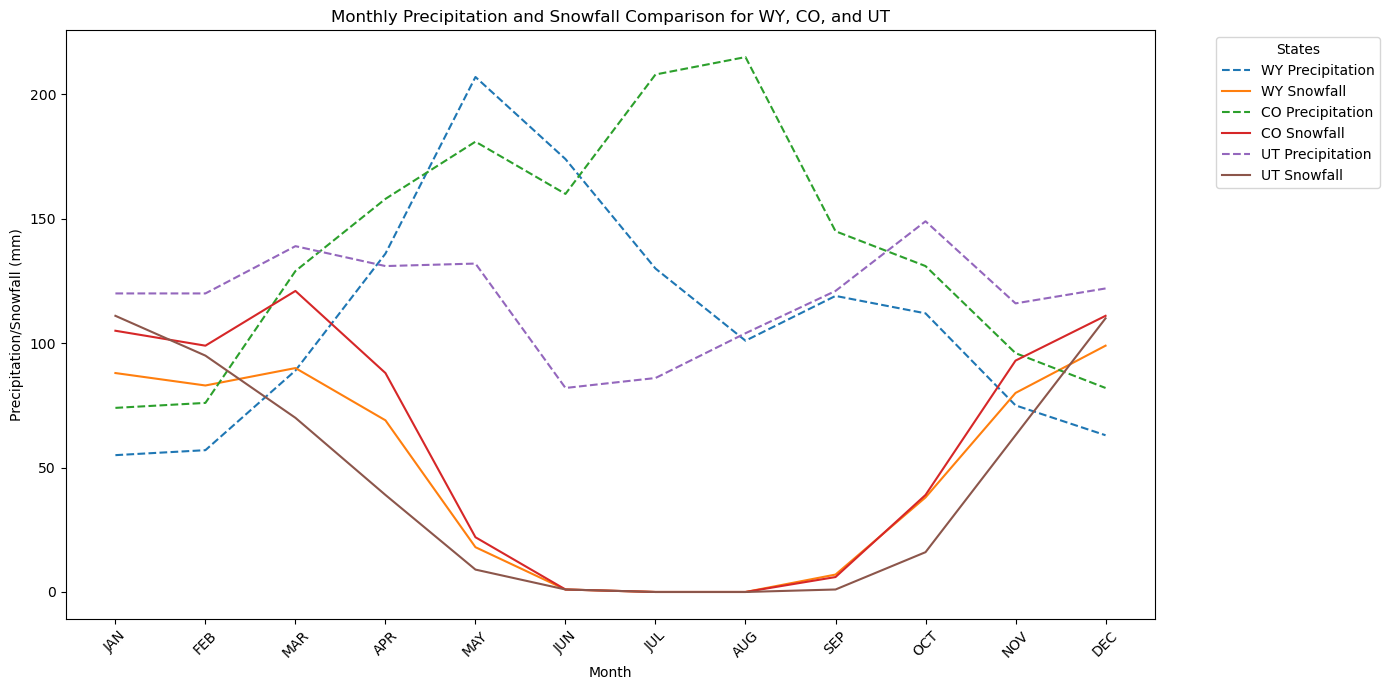

In [18]:
# Define the correct month order
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

plt.figure(figsize=(14, 7))

# Plotting precipitation and snowfall for each state
for state in states_of_interest:
    state_data = combined_precip_snow_df[combined_precip_snow_df['STATE'] == state]
    # Plot precipitation
    plt.plot(months, state_data.iloc[0, 1:13], label=f'{state} Precipitation', linestyle='--')
    # Plot snowfall
    plt.plot(months, state_data.iloc[0, 13:], label=f'{state} Snowfall')

plt.xlabel('Month')
plt.ylabel('Precipitation/Snowfall (mm)')
plt.title('Monthly Precipitation and Snowfall Comparison for WY, CO, and UT')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/3h/2c5rpls550q5t_jwdflxbycm0000gn/T/ipykernel_86957/2811497678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ski_resorts_filtered_df['State/Province'] = ski_resorts_filtered_df['State/Province'].replace({'Wyoming': 'WY', 'Colorado': 'CO', 'Utah': 'UT'})


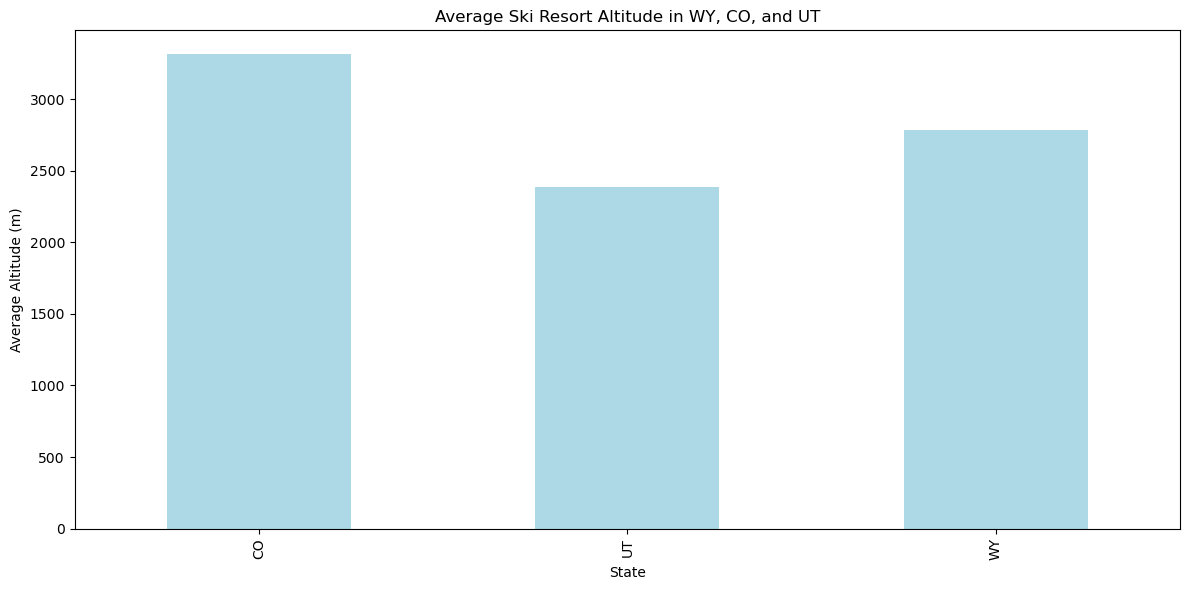

In [20]:
plt.figure(figsize=(12, 6))

# Replace state names with abbreviations for consistency
ski_resorts_filtered_df['State/Province'] = ski_resorts_filtered_df['State/Province'].replace({'Wyoming': 'WY', 'Colorado': 'CO', 'Utah': 'UT'})

# Calculate the average altitude for each state
altitudes = ski_resorts_filtered_df[ski_resorts_filtered_df['State/Province'].isin(states_of_interest)].groupby('State/Province')['Altitude'].mean()

# Plot the average altitudes
altitudes.plot(kind='bar', color='lightblue')
plt.xlabel('State')
plt.ylabel('Average Altitude (m)')
plt.title('Average Ski Resort Altitude in WY, CO, and UT')
plt.tight_layout()
plt.show()